# Zipline on Colab

In this notebook, I've shown how to install zipline on colab and ingest data.<br>
I've used `MACD` as a trend following indicator.<br>
- I tuned 3 parameters for MACD with 180 iterations and bactested 5 assets from SnP500 for 3 years (2018-21) using `zipline`.<br>
- My goal was to use the Colab fast hardwares to tune the parameters which takes 4-5 hours on my pc but here it takes only 30 min.

Installation Guideline > [Link](https://exchange.ml4trading.io/t/zipline-in-google-colab/203)

Copy and paste the below code blocks to Colab Cells.
Will show some errors but check whether it shows the zipline version or not. If shows then everything is ok!<br>
It is not needed to install zipline again after this session but data need to be ingested again.
```
%%bash
wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
tar -xzf ta-lib-0.4.0-src.tar.gz
cd ta-lib/
./configure
make
make install
```
**and then install using pip:**
```
%pip install zipline-reloaded
```
**After this,**
```
import zipline
zipline.__version__
```
**should show the latest version.**

# Zipline installation

In [ ]:
%%bash
wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
tar -xzf ta-lib-0.4.0-src.tar.gz
cd ta-lib/
./configure
make
make install

checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /usr/bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking for C compiler default output file name... a.out
checking whether the C compiler works... yes
checking whether we are cross compiling... no
checking for suffix of executables... 
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for style of include used by make... GNU
checking dependency style of gcc... gcc3
checking build system type... x86_64-unknown-linux-gnu
checking host system type... x86_64-unknown-linux-gnu
checking for a sed that does not truncate output... /usr/bin/sed
checking for grep that handles long lines and -e... /usr/bin/grep
chec

--2024-01-23 01:49:44--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-01-23 01:49:44--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-01-23 01:49:44--  http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cytranet.dl.s

In [ ]:
%pip install zipline-reloaded

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.0/354.0 kB 43.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 39.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 42.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.3/191.3 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 38.5 MB/s eta 0:00:00
  Cre

In [ ]:
import zipline
zipline.__version__

/usr/local/lib/python3.10/dist-packages/exchange_calendars/exchange_calendar.py:2347: FutureWarning: 'T' is deprecated and will be removed in a future version. Please use 'min' instead of 'T'.
  align: pd.Timedelta | str = pd.Timedelta(1, "T"),


'3.0.3'

# *Quantstats Installation*

In [ ]:
!pip install quantstats

In [ ]:
import quantstats as qs

# Bactest with Zipline

In [ ]:
import pandas as pd
import os
%load_ext zipline
from zipline.api import symbol, set_benchmark, order,record, order_target, get_open_orders,order_target_percent,set_benchmark
from zipline.utils.calendar_utils import get_calendar
from zipline import run_algorithm
import matplotlib.pyplot as plt
import numpy as np
from zipline.data import bundles
%matplotlib inline
import matplotlib.pyplot as plt
import quantstats as qs
import tqdm

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


In [ ]:
!zipline bundles;

/usr/local/lib/python3.10/dist-packages/exchange_calendars/exchange_calendar.py:2347: FutureWarning: 'T' is deprecated and will be removed in a future version. Please use 'min' instead of 'T'.
  align: pd.Timedelta | str = pd.Timedelta(1, "T"),
csvdir <no ingestions>
quandl <no ingestions>
quantopian-quandl <no ingestions>


### Path to the data that is ingested

'/content/drive/MyDrive/Colab Notebooks/Data/daily'

In [ ]:
from zipline.data import bundles

bundle_name = 'snp100'

bundles.register(
    bundle_name,
    bundles.csvdir.csvdir_equities(
        ['daily'],
        '/content/drive/MyDrive/Colab Notebooks/Data/snp500'
    ),
    calendar_name='NYSE',

)

bundles.bundles

mappingproxy({'quandl': RegisteredBundle(calendar_name='NYSE', start_session=None, end_session=None, minutes_per_day=390, ingest=<function quandl_bundle at 0x7d075b039870>, create_writers=True),
              'quantopian-quandl': RegisteredBundle(calendar_name='NYSE', start_session=None, end_session=None, minutes_per_day=390, ingest=<function quantopian_quandl_bundle at 0x7d075b039a20>, create_writers=False),
              'csvdir': RegisteredBundle(calendar_name='NYSE', start_session=None, end_session=None, minutes_per_day=390, ingest=<function csvdir_bundle at 0x7d075b039c60>, create_writers=True),
              'snp100': RegisteredBundle(calendar_name='NYSE', start_session=None, end_session=None, minutes_per_day=390, ingest=<bound method CSVDIRBundle.ingest of <zipline.data.bundles.csvdir.CSVDIRBundle object at 0x7d0791efb850>>, create_writers=True)})

In [ ]:
bundles.ingest(bundle_name)

In [ ]:
!zipline bundles;

/usr/local/lib/python3.10/dist-packages/exchange_calendars/exchange_calendar.py:2347: FutureWarning: 'T' is deprecated and will be removed in a future version. Please use 'min' instead of 'T'.
  align: pd.Timedelta | str = pd.Timedelta(1, "T"),
csvdir <no ingestions>
quandl <no ingestions>
quantopian-quandl <no ingestions>


It will not show the ingestested bundles

In [ ]:
bundle_data = bundles.load(bundle_name)
sids = bundle_data.asset_finder.sids
assets = bundle_data.asset_finder.retrieve_all(sids)

print(assets)

[Equity(0 [A]), Equity(1 [AAL]), Equity(2 [AAP]), Equity(3 [AAPL]), Equity(4 [ABBV]), Equity(5 [ABC]), Equity(6 [ABT]), Equity(7 [ACGL]), Equity(8 [ACN]), Equity(9 [ADBE]), Equity(10 [ADI]), Equity(11 [ADM]), Equity(12 [ADP]), Equity(13 [ADSK]), Equity(14 [AEE]), Equity(15 [AEP]), Equity(16 [AES]), Equity(17 [AFL]), Equity(18 [AIG]), Equity(19 [AIZ]), Equity(20 [AJG]), Equity(21 [AKAM]), Equity(22 [ALB]), Equity(23 [ALGN]), Equity(24 [ALK]), Equity(25 [ALL]), Equity(26 [ALLE]), Equity(27 [AMAT]), Equity(28 [AMCR]), Equity(29 [AMD]), Equity(30 [AME]), Equity(31 [AMGN]), Equity(32 [AMP]), Equity(33 [AMT]), Equity(34 [AMZN]), Equity(35 [ANET]), Equity(36 [ANSS]), Equity(37 [AON]), Equity(38 [AOS]), Equity(39 [APA]), Equity(40 [APD]), Equity(41 [APH]), Equity(42 [APTV]), Equity(43 [ARE]), Equity(44 [ATO]), Equity(45 [ATVI]), Equity(46 [AVB]), Equity(47 [AVGO]), Equity(48 [AVY]), Equity(49 [AWK]), Equity(50 [AXON]), Equity(51 [AXP]), Equity(52 [AZO]), Equity(53 [BA]), Equity(54 [BAC]), Equi

All data are ingested successfully

# MACD as an indicator

In [ ]:
def ema(day,price_hist):
    mulitplier = 2/(day+1)
    ema_list = []
    ema_prev = price_hist[0]
    ema_list.append(ema_prev)

    for price in price_hist[1:]:
        ema = (price - ema_prev) * mulitplier + ema_prev
        ema_list.append(ema)
        ema_prev =ema

    return ema_list

In [ ]:
def rolling_sharpe(ret):
    return np.multiply(np.divide(ret.mean(), ret.std()), np.sqrt(252))

def get_rolling_stats(result, r_window):
    result["rolling_sharpe"] = result["portfolio_value"].pct_change().rolling(r_window).apply(rolling_sharpe)
    result["rolling_vol"] = result["portfolio_value"].pct_change().rolling(r_window).std()
    stats = [result.rolling_sharpe.mean(), result.portfolio_value.mean(), result.rolling_vol.mean()]
    return result, stats

def show_rolling_stats(result, r_window):
    result, stats = get_rolling_stats(result, r_window)
    fig, ax = plt.subplots(1, 3, figsize=(18,4))
    result['rolling_sharpe'].plot(ax = ax[0], title='Rolling sharpe')
    result['rolling_vol'].plot(ax = ax[1], title='Rolling vol')
    result['portfolio_value'].plot(ax = ax[2], title='Portfolio value')
    plt.show()
    return result

### Tune 3 parameters with 180 iteration for 5 assets from snp500

In [ ]:
%%capture
calendar = get_calendar('XNYS')
capital_base = 10000

resutlt_dict = {}
for short_window in tqdm.tqdm(range(10, 51, 10)):
    for long_window in tqdm.tqdm(range(100, 300, 20)):
        for signal_window in tqdm.tqdm(range(4, 15, 3)):
            if signal_window >= short_window or short_window >= long_window: continue

            def initialize(context):
                context.i = 0
                context.assets = [symbol("AAPL"), symbol("XOM"), symbol("LLY"),symbol("JPM"),symbol("PEP")]

            def handle_data(context, data):
                context.i += 1
                if context.i < 100: return
                for asset in context.assets:
                    buy_signal = False
                    sell_signal  =False
                    price_hist = data.history(asset,'price', bar_count=26, frequency='1d')
                    long_term_mavg = data.history(asset, 'close', bar_count=100, frequency='1d').mean()
                    trend_up = price_hist[-1] > long_term_mavg

                    ema_long = ema(long_window,price_hist)
                    ema_short = ema(short_window,price_hist)
                    MACD = [ema_short[j]-ema_long[j] for j in range(len(price_hist))]
                    signal = ema(signal_window,MACD)

                    cash = context.portfolio.cash
                    price = data.current(asset, "price") # current price of the stock

                    open_orders = get_open_orders()
                    if asset not in open_orders and data.can_trade(asset):
                        if MACD[-1]>signal[-1] and MACD[-2] < signal[-2] and MACD[-1] > 0 and trend_up:    # Bullish crossover
                            order_target(asset,cash // price) # buy as many shares as possible

                        elif MACD[-1]<signal[-1] and MACD[-2] > signal[-2] and MACD[-1] < 0:    # Bearish crossover
                            order_target(asset,0) # sell all shares by closing

                    record( closing_price = data.current(asset, "close"),
                            MACD = MACD[-1],
                            signal =signal[-1],
                            long_term_mavg=long_term_mavg,
                            )

            start_date = pd.to_datetime('2018-01-02', format='%Y-%m-%d')
            end_date = pd.to_datetime('2021-01-01', format='%Y-%m-%d')

            result = run_algorithm(
                start = start_date,
                end = end_date,
                initialize=initialize,
                handle_data = handle_data,
                trading_calendar=calendar,
                bundle='snp100',
                capital_base=capital_base,
                data_frequency='daily'
            )
            _,stats = get_rolling_stats(result, 100)
            resutlt_dict[str(short_window) + str("-") + str(long_window) + str("-") + str(signal_window)] = stats

In [ ]:
test = pd.DataFrame({"windows":resutlt_dict.keys(), "stats": resutlt_dict.values()})
test["sharpe"] = [test["stats"][i][0] for i in test.index]
test["value"] = [test["stats"][i][1] for i in test.index]
test["vol"] = [test["stats"][i][2] for i in test.index]
test["signal"] = [test["windows"][i].split("-")[2] for i in test.index]
test["short"] = [test["windows"][i].split("-")[0] for i in test.index]
test["long"] = [test["windows"][i].split("-")[1] for i in test.index]

**Choose the best parameters ranked by Sharp Ratio**

In [ ]:
test.sort_values(by="sharpe", ascending = False).head()

,windows,stats,sharpe,value,vol,signal,short,long
76,30-180-4,"[1.4739186775406536, 14750.017662834656, 0.009...",1.473919,14750.017663,0.009882,4,30,180
14,10-240-4,"[1.302492110335981, 13710.205528066805, 0.0141...",1.302492,13710.205528,0.014196,4,10,240
4,10-140-4,"[1.2785688897085261, 13275.39442302778, 0.0155...",1.278569,13275.394423,0.015553,4,10,140
68,30-140-4,"[1.221150107471571, 13963.699167308865, 0.0099...",1.221150,13963.699167,0.009925,4,30,140
64,30-120-4,"[1.2113965469080794, 13944.036316779762, 0.009...",1.211397,13944.036317,0.009914,4,30,120


**Choose the best parameters ranked by Portfolio value**

In [ ]:
test.sort_values(by="value", ascending = False).head()

,windows,stats,sharpe,value,vol,signal,short,long
76,30-180-4,"[1.4739186775406536, 14750.017662834656, 0.009...",1.473919,14750.017663,0.009882,4,30,180
68,30-140-4,"[1.221150107471571, 13963.699167308865, 0.0099...",1.221150,13963.699167,0.009925,4,30,140
64,30-120-4,"[1.2113965469080794, 13944.036316779762, 0.009...",1.211397,13944.036317,0.009914,4,30,120
14,10-240-4,"[1.302492110335981, 13710.205528066805, 0.0141...",1.302492,13710.205528,0.014196,4,10,240
3,10-120-7,"[0.834521500921432, 13490.151500025133, 0.0183...",0.834522,13490.151500,0.018329,7,10,120


### In both cases 30 and 180 for EMA window and 4 for signal window lenth are better

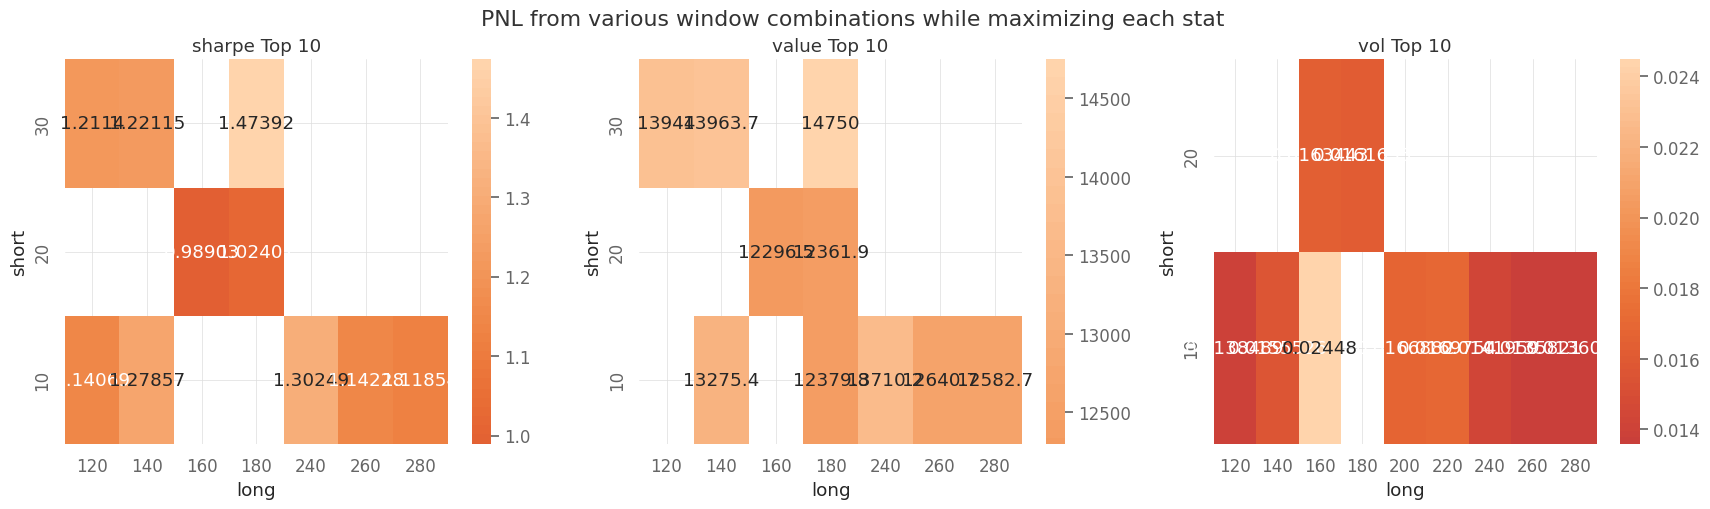

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(pnls, trends):
    fig, axes = plt.subplots(1, 3, figsize=(21, 5))
    fig.suptitle('PNL from various window combinations while maximizing each stat')

    for i, phase in trends.items():
        # Drop duplicates from the DataFrame
        pnls_no_duplicates = pnls.drop_duplicates(subset=['short', 'long', phase])

        table = pnls_no_duplicates.sort_values(by=phase, ascending=False).head(10).pivot(
            index='short', columns='long', values=phase
        )

        sns.heatmap(table, ax=axes[i], center=0, annot=table, fmt='g').invert_yaxis()
        axes[i].set_title(phase + str(" Top 10"))

    plt.show()

trends = {0: 'sharpe', 1: 'value', 2: 'vol'}

pmap = test.drop(columns=['windows', 'stats'])

cols = pmap.columns
pmap[cols] = pmap[cols].apply(pd.to_numeric, errors='coerce')
pmap_no_duplicates = pmap.drop_duplicates(subset=['short', 'long'])

plot_heatmap(pmap_no_duplicates, trends)